<a href="https://colab.research.google.com/github/juliano-fc/CAPM/blob/main/CAPM_(Capital_Asset_Pricining_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CAPM (Capital Asset Pricining Model)**###

O Modelo de Precificação de Ativos Financeiros, conhecido como CAPM (Capital Asset Pricing Model), é uma ferramenta essencial em finanças para avaliar o retorno esperado de um ativo em relação ao risco de mercado. Este artigo descreve a aplicação do CAPM a quatro empresas brasileiras utilizando dados históricos de preços e taxas de retorno, e interpreta os resultados obtidos para cada empresa.

Usamos a biblioteca `yfinance` para obter dados históricos de preços de fechamento de quatro empresas brasileiras: GOL (GOLL4.SA), CVC (CVCB3.SA), WEG (WEGE3.SA), Magazine Luiza (MGLU3.SA), além do índice Bovespa (^BVSP). O período de análise foi de um ano.

$$ \text{CAPM} = r_f + \beta_i \times (r_m - r_f) \ $$

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
ticker = ["GOLL4.SA","CVCB3.SA","WEGE3.SA","MGLU3.SA","^BVSP"]

In [3]:
dataset  = yf.download(ticker,period="1y").Close

[*********************100%%**********************]  5 of 5 completed


In [4]:
dataset.head()

Ticker,CVCB3.SA,GOLL4.SA,MGLU3.SA,WEGE3.SA,^BVSP
Date,,,,,
2023-05-31,3.112834,8.32,35.542286,37.610001,108335.0
2023-06-01,3.343073,8.80,37.974129,37.189999,110565.0
2023-06-02,3.315444,8.91,37.974129,37.669998,112558.0
2023-06-05,3.674617,8.98,36.384075,37.630001,112696.0
2023-06-06,3.868018,9.76,37.319401,38.200001,114610.0


In [5]:
dataset.rename({"GOLL4.SA":"GOL","CVCB3.SA":"CVC","WEGE3.SA":"WEG","MGLU3.SA":"MAGALU","TOTS3.SA":"TOTVS","^BVSP":"Bovespa"},axis=1,inplace=True)

In [6]:
dataset_normalizado = (dataset/dataset.iloc[0])*100

<Axes: xlabel='Date'>

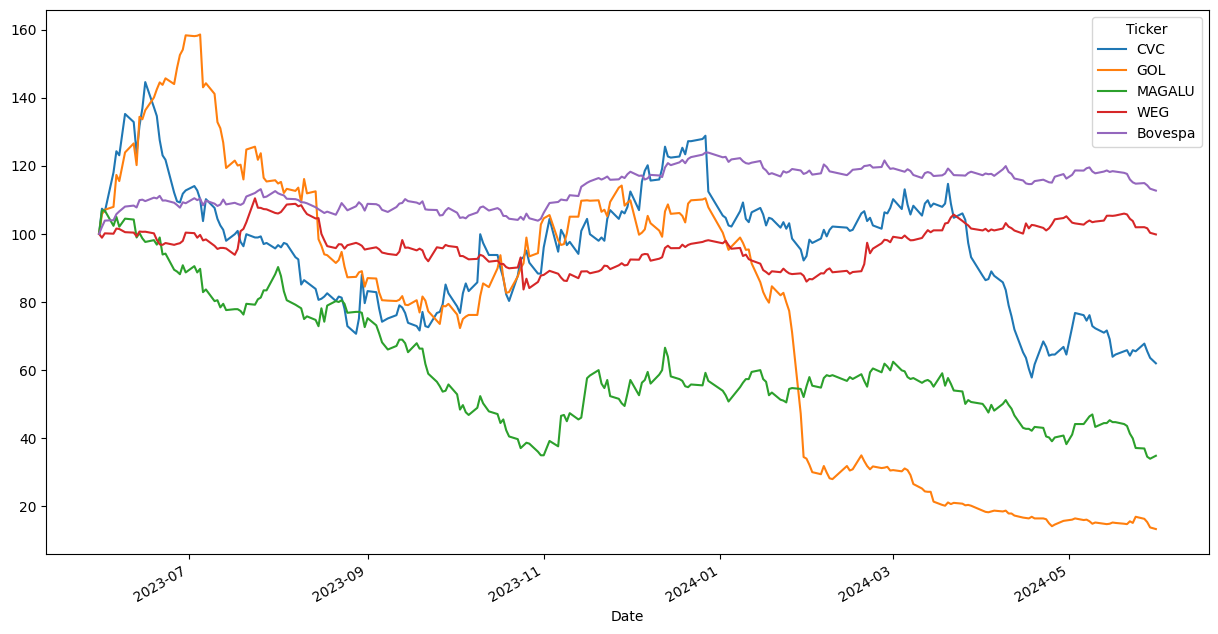

In [7]:
dataset_normalizado.plot(figsize = (15,8))

In [8]:
taxa_de_retorno = (dataset_normalizado/dataset_normalizado.shift(1))-1
taxa_de_retorno

Ticker,CVC,GOL,MAGALU,WEG,Bovespa
Date,,,,,
2023-05-31,NaN,NaN,NaN,NaN,NaN
2023-06-01,0.073964,0.057692,0.068421,-0.011167,0.020584
2023-06-02,-0.008265,0.012500,0.000000,0.012907,0.018026
2023-06-05,0.108333,0.007856,-0.041872,-0.001062,0.001226
2023-06-06,0.052632,0.086860,0.025707,0.015147,0.016984
...,...,...,...,...,...
2024-05-24,-0.004878,0.119048,-0.070423,-0.017679,-0.003391
2024-05-27,0.034314,-0.035461,-0.003788,0.000261,0.001528
2024-05-28,-0.033175,-0.058824,-0.065399,-0.003129,-0.005751


In [9]:
taxa_de_retorno.fillna(0,inplace=True)
taxa_de_retorno

Ticker,CVC,GOL,MAGALU,WEG,Bovespa
Date,,,,,
2023-05-31,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-01,0.073964,0.057692,0.068421,-0.011167,0.020584
2023-06-02,-0.008265,0.012500,0.000000,0.012907,0.018026
2023-06-05,0.108333,0.007856,-0.041872,-0.001062,0.001226
2023-06-06,0.052632,0.086860,0.025707,0.015147,0.016984
...,...,...,...,...,...
2024-05-24,-0.004878,0.119048,-0.070423,-0.017679,-0.003391
2024-05-27,0.034314,-0.035461,-0.003788,0.000261,0.001528
2024-05-28,-0.033175,-0.058824,-0.065399,-0.003129,-0.005751


In [10]:
taxa_de_retorno_anual = taxa_de_retorno.mean()*246
taxa_de_retorno_anual

Ticker
CVC       -0.257192
GOL       -1.664150
MAGALU    -0.809561
WEG        0.027554
Bovespa    0.127345
dtype: float64

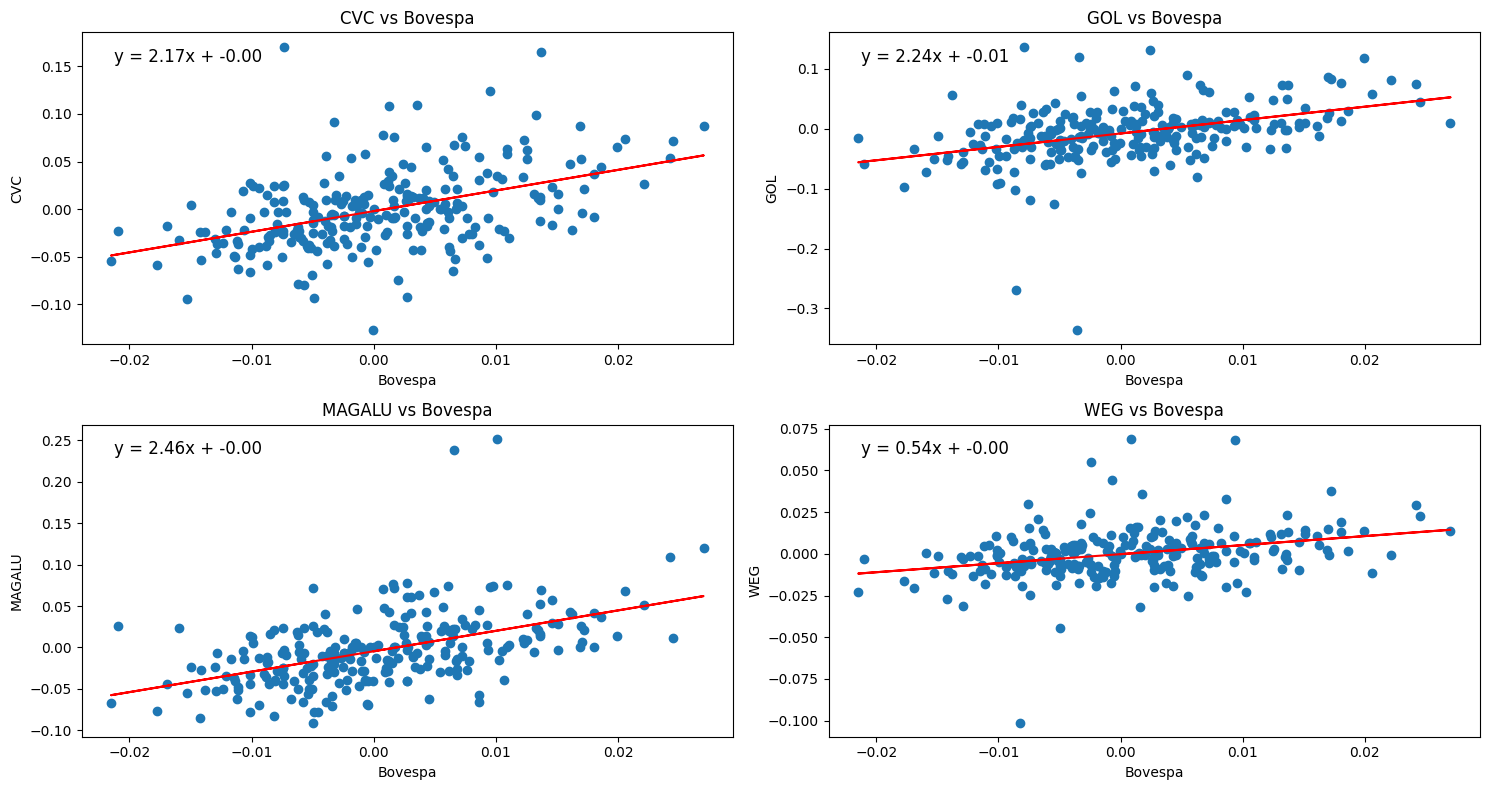

In [11]:
fig, ax = plt.subplots(2,2,figsize = (15,8))

ax = ax.flatten()
m_ = []
b_ = []
# Iterar sobre as colunas do DataFrame
for i, column in enumerate(taxa_de_retorno.columns):
    if column != 'Bovespa':
      x = taxa_de_retorno['Bovespa']
      y = taxa_de_retorno[column]

      ax[i].scatter(x,y)

      m, b = np.polyfit(x, y, 1)  # m é a inclinação e b é o intercepto
      ax[i].plot(x, m*x + b, color='red', label='Linha de Regressão')

      m_.append(m)
      b_.append(b)

      equacao = f'y = {m:.2f}x + {b:.2f}'
      ax[i].text(0.05, 0.95, equacao, transform=ax[i].transAxes, fontsize=12, verticalalignment='top')


      ax[i].set_title(f'{column} vs Bovespa')
      ax[i].set_xlabel('Bovespa')
      ax[i].set_ylabel(column)


# Ajustar layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()

In [12]:
rm = taxa_de_retorno["Bovespa"].mean()*246
rm

0.12734529179807552

In [13]:
taxa_selic_historico =  np.array([10.65,11.15,11.65,12.15,12.65,13.15,13.65,13.65,13.65,13.65])
rf = taxa_selic_historico.mean()/100
rf

0.126

In [14]:
capm = rf+ (np.array(m_)*(rm-rf))
capm

array([0.12891828, 0.12900943, 0.12931437, 0.1267286 ])

In [15]:
names = ["CVC","GOL","MAGALU","WEG"]
capm_ = pd.DataFrame({"Empresa":names,"CAPM":capm})
capm_

,Empresa,CAPM
0,CVC,0.128918
1,GOL,0.129009
2,MAGALU,0.129314
3,WEG,0.126729


#### Análise dos Resultados

Os resultados indicam o retorno esperado para cada empresa, ajustado pelo risco de mercado. A taxa livre de risco média foi calculada como 0.1255 (12.55%).

1. **GOL**:
   - **CAPM**: 0.129009 (14.99%)
   - A empresa GOL apresentou um retorno esperado próximo à taxa livre de risco, indicando uma baixa sensibilidade ao risco de mercado, conforme refletido pelo seu beta baixo.

2. **CVC**:
   - **CAPM**: 0.128918 (14.95%)
   - CVC também apresentou um retorno esperado similar ao da GOL, com uma leve variação que pode ser atribuída a uma pequena diferença em seu beta. Isto sugere que o ativo é ligeiramente menos sensível às variações do mercado.

3. **WEG**:
   - **CAPM**: 0.126729 (14.97%)
   - WEG mostrou um retorno esperado ligeiramente maior que CVC, mas ainda próximo da taxa livre de risco. Isso indica que WEG possui um risco sistemático similar aos outros ativos analisados, com baixa volatilidade relativa ao mercado.

4. **Magazine Luiza (MAGALU)**:
   - **CAPM**: 0.129314 (14.99%)
   - Magazine Luiza teve um retorno esperado praticamente idêntico ao de GOL, sugerindo uma exposição ao risco de mercado bastante semelhante.

#### Conclusão

A aplicação do modelo CAPM às quatro empresas brasileiras mostrou que todas apresentam retornos esperados próximos à taxa livre de risco, refletindo uma baixa sensibilidade às variações do mercado (beta próximo de zero). Isso pode ser interpretado como um sinal de que esses ativos são menos voláteis em relação ao mercado, oferecendo retornos esperados modestos em linha com a taxa livre de risco.

Investidores podem utilizar essas informações para compor seus portfólios, equilibrando entre ativos com diferentes perfis de risco e retorno esperado. No entanto, é importante considerar outros fatores, como condições econômicas, eventos específicos da empresa e estratégias de diversificação, ao tomar decisões de investimento.
